Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense

**Dwa gangi**

Zbiór danych:

In [34]:
[0]*10+[1]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [35]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000)
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2)
labels = np.asarray([[0.,1.]]*len(x_label1)+[[1.,0.]]*len(x_label2))
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

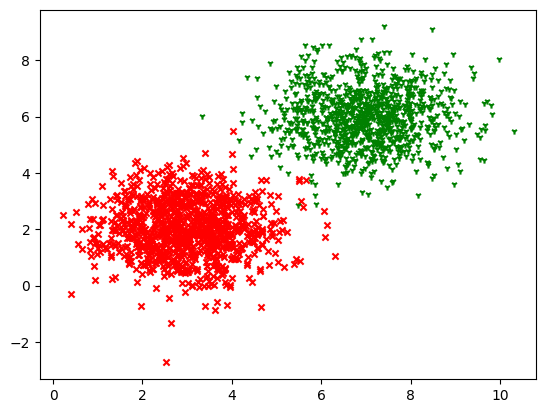

In [36]:
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

In [37]:
x_label1

array([0.40152196, 2.93831545, 3.41174677, 3.03733538, 3.98535762,
       2.354616  , 1.88575805, 1.30379007, 1.91908908, 2.7039785 ,
       1.56651615, 1.92381281, 2.01220152, 3.57378415, 2.80154343,
       3.33464497, 4.81849132, 1.30040118, 2.99383035, 2.09553679,
       2.59935152, 4.66830935, 3.43386841, 2.01071037, 2.15305582,
       3.52701656, 0.92925785, 3.78457485, 2.40110289, 1.52311933,
       1.9292556 , 1.90100665, 1.79194367, 2.99577086, 3.87175706,
       4.40881533, 3.84538161, 3.80760611, 2.84107576, 4.5165825 ,
       2.95677304, 2.65004894, 2.67810842, 3.0058633 , 2.68861826,
       1.95203832, 2.47401335, 2.53503883, 2.69215232, 2.53203265,
       3.68257353, 2.01552447, 1.97258819, 3.11228147, 1.99004634,
       3.94853525, 4.87438924, 2.6723702 , 1.30963751, 1.34990537,
       3.39168751, 3.66963376, 3.83637341, 2.57885727, 2.55504339,
       2.60478192, 4.16282595, 1.82113426, 3.31438304, 2.41039467,
       3.51808401, 3.69733478, 2.77595841, 0.88184253, 2.83857

Definiujemy model:

In [38]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [39]:
model.add(Dense(units = 2, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [40]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [41]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [43]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[ 0.40152196, -0.27913799],
       [ 2.93831545,  3.15416321],
       [ 3.41174677,  0.25690969],
       ...,
       [ 4.44440077,  5.8797627 ],
       [ 8.0019706 ,  6.79916435],
       [ 7.88941671,  7.03935654]])

Proces **uczenia**:

In [44]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 5ms/step - loss: 0.7327 - val_loss: 0.4356
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5293 - val_loss: 0.3598
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4565 - val_loss: 0.2777
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4066 - val_loss: 0.2893
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3680 - val_loss: 0.2976
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.3338 - val_loss: 0.2352
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3066 - val_loss: 0.1925
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2835 - val_loss: 0.1868
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2641 - val_loss: 0.2429
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2459 - val_loss: 0.2383
Epoch 11/

In [45]:
Loss = h.history['loss']
Loss

[0.7327116131782532,
 0.529324471950531,
 0.45654866099357605,
 0.4066392481327057,
 0.36796367168426514,
 0.3338189423084259,
 0.3066069483757019,
 0.28346818685531616,
 0.2640593349933624,
 0.24588988721370697,
 0.23215723037719727,
 0.21834702789783478,
 0.20637139678001404,
 0.19603809714317322,
 0.18662109971046448,
 0.17844291031360626,
 0.17067848145961761,
 0.16368602216243744,
 0.15759938955307007,
 0.15198098123073578,
 0.1464662402868271,
 0.14149536192417145,
 0.1371081918478012,
 0.13289976119995117,
 0.12897688150405884,
 0.12540380656719208,
 0.12190599739551544,
 0.11842979490756989,
 0.11542394012212753,
 0.11280253529548645,
 0.11008024960756302,
 0.10736700147390366,
 0.10527729243040085,
 0.10282066464424133,
 0.10054361075162888,
 0.09850732982158661,
 0.09653154015541077,
 0.09461416304111481,
 0.09284456074237823,
 0.09110259264707565,
 0.08953161537647247,
 0.08788759261369705,
 0.08663452416658401,
 0.08503533154726028,
 0.08351403474807739,
 0.0822265371680259

Sprawdźmy jakie są **wartości wag**:

In [46]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[ 0.8162037  -0.81870586]
 [ 1.1267896  -1.1290156 ]]
[-8.6111145  8.633041 ]


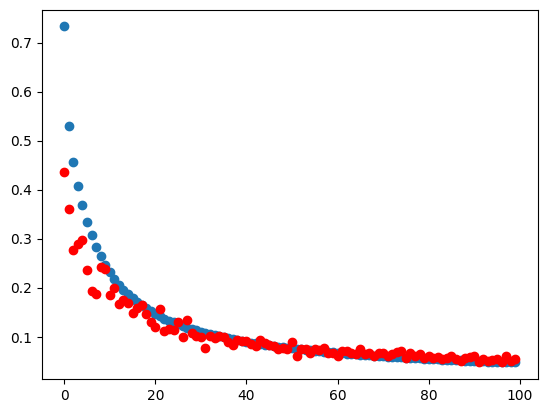

In [47]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

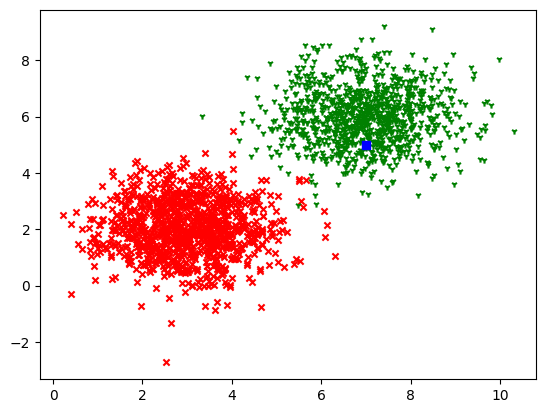

In [48]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [49]:
model.predict([[x,y]])

1/1 [==============================] - 0s 71ms/step


array([[0.9958448 , 0.00415518]], dtype=float32)

Learning rate 0.01

Definiujemy model:

In [50]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [51]:
model.add(Dense(units = 2, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [52]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

In [53]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [55]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[ 0.40152196, -0.27913799],
       [ 2.93831545,  3.15416321],
       [ 3.41174677,  0.25690969],
       ...,
       [ 4.44440077,  5.8797627 ],
       [ 8.0019706 ,  6.79916435],
       [ 7.88941671,  7.03935654]])

Proces **uczenia**:

In [56]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 5ms/step - loss: 0.9146 - val_loss: 0.3838
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7450 - val_loss: 0.4706
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7169 - val_loss: 0.4688
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6965 - val_loss: 0.4505
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6777 - val_loss: 0.4530
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6601 - val_loss: 0.4488
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6435 - val_loss: 0.4184
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6281 - val_loss: 0.4213
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6140 - val_loss: 0.4103
Epoch 10/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6005 - val_loss: 0.4042
Epoch 11/

In [57]:
Loss = h.history['loss']
Loss

[0.9145658612251282,
 0.745006263256073,
 0.7168939709663391,
 0.6965272426605225,
 0.6776854991912842,
 0.6600848436355591,
 0.6435328125953674,
 0.6281391382217407,
 0.6140086650848389,
 0.6004950404167175,
 0.5876808762550354,
 0.5763421654701233,
 0.5651084780693054,
 0.5545523166656494,
 0.5448409914970398,
 0.5351911783218384,
 0.5263980627059937,
 0.5176879167556763,
 0.5095460414886475,
 0.5016463994979858,
 0.49405333399772644,
 0.4868803918361664,
 0.479947954416275,
 0.4731743633747101,
 0.46660682559013367,
 0.46056151390075684,
 0.4544258117675781,
 0.4486228823661804,
 0.4429225027561188,
 0.4373033940792084,
 0.4320012331008911,
 0.42692333459854126,
 0.4217163026332855,
 0.4168265163898468,
 0.41202667355537415,
 0.4073260426521301,
 0.4028124213218689,
 0.398355633020401,
 0.3939601182937622,
 0.38978850841522217,
 0.3856719136238098,
 0.38143402338027954,
 0.37762096524238586,
 0.3737662434577942,
 0.3700096905231476,
 0.3663683831691742,
 0.3626810908317566,
 0.35912

Sprawdźmy jakie są **wartości wag**:

In [58]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[ 0.11759357 -0.15217455]
 [ 0.64022464 -0.6263372 ]]
[-2.972349   3.0955665]


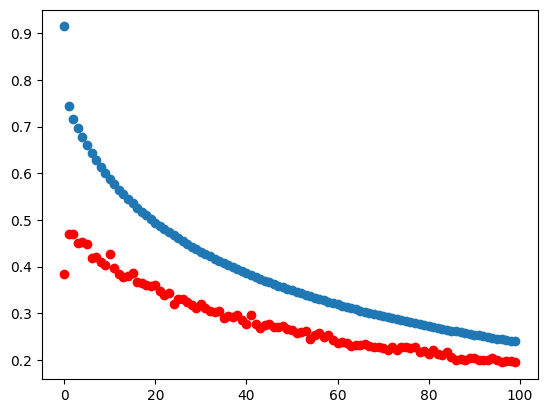

In [59]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

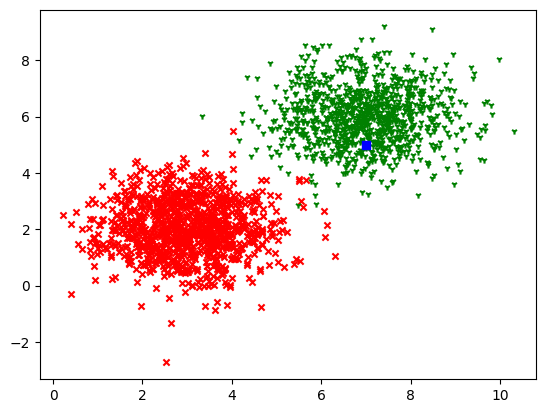

In [60]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [61]:
model.predict([[x,y]])

1/1 [==============================] - 0s 69ms/step


array([[0.8959739 , 0.10402602]], dtype=float32)

Learning rate 0.1 optimizer ADAM

Definiujemy model:

In [62]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [63]:
model.add(Dense(units = 2, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [64]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [65]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [67]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[ 0.40152196, -0.27913799],
       [ 2.93831545,  3.15416321],
       [ 3.41174677,  0.25690969],
       ...,
       [ 4.44440077,  5.8797627 ],
       [ 8.0019706 ,  6.79916435],
       [ 7.88941671,  7.03935654]])

Proces **uczenia**:

In [68]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 5ms/step - loss: 0.6373 - val_loss: 0.3237
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2344 - val_loss: 0.1906
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1350 - val_loss: 0.1370
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0938 - val_loss: 0.0562
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0721 - val_loss: 0.0838
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0589 - val_loss: 0.0574
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0501 - val_loss: 0.0555
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0432 - val_loss: 0.0459
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0435
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0343 - val_loss: 0.0458
Epoch 11/

In [69]:
Loss = h.history['loss']
Loss

[0.6372881531715393,
 0.2343868464231491,
 0.13497692346572876,
 0.09378357976675034,
 0.0720965787768364,
 0.05890606716275215,
 0.05005776882171631,
 0.04315536841750145,
 0.038393907248973846,
 0.03425532951951027,
 0.03121165744960308,
 0.0292245801538229,
 0.027282705530524254,
 0.02470926009118557,
 0.02321873977780342,
 0.021933143958449364,
 0.02097822166979313,
 0.020756693556904793,
 0.01946362294256687,
 0.01856408268213272,
 0.01765448972582817,
 0.016826899722218513,
 0.015969736501574516,
 0.01568770594894886,
 0.01557920966297388,
 0.015323145315051079,
 0.01444348692893982,
 0.014350974932312965,
 0.01390122901648283,
 0.013777938671410084,
 0.013018732890486717,
 0.012837287969887257,
 0.01268781628459692,
 0.013501065783202648,
 0.012890320271253586,
 0.012887457385659218,
 0.012848172336816788,
 0.01204681396484375,
 0.01184532418847084,
 0.011071717366576195,
 0.011110560037195683,
 0.011166756972670555,
 0.012833449989557266,
 0.011409718543291092,
 0.0101253660395

Sprawdźmy jakie są **wartości wag**:

In [70]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[ 2.8504522 -2.8678107]
 [ 3.102164  -3.1187928]]
[-26.429867  26.581158]


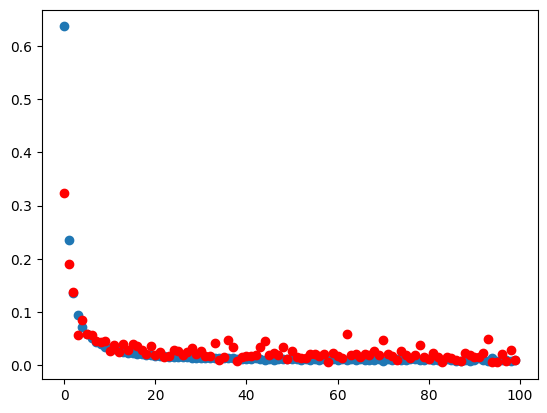

In [71]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

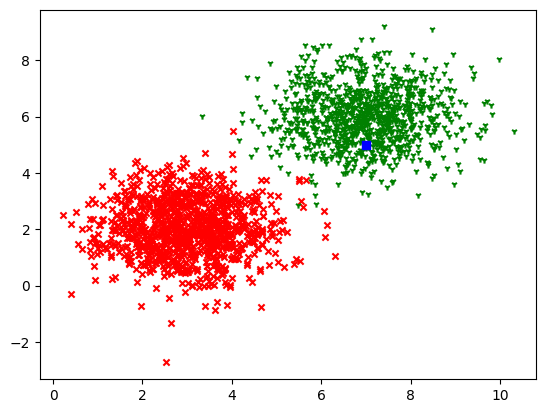

In [72]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [73]:
model.predict([[x,y]])

1/1 [==============================] - 0s 60ms/step


array([[1.000000e+00, 1.348617e-08]], dtype=float32)

Learning rate 0.01 Optimizer Adam

Definiujemy model:

In [74]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [75]:
model.add(Dense(units = 2, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [76]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [77]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [78]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [79]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[ 0.40152196, -0.27913799],
       [ 2.93831545,  3.15416321],
       [ 3.41174677,  0.25690969],
       ...,
       [ 4.44440077,  5.8797627 ],
       [ 8.0019706 ,  6.79916435],
       [ 7.88941671,  7.03935654]])

Proces **uczenia**:

In [80]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 5ms/step - loss: 1.5166 - val_loss: 1.4643
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7667 - val_loss: 0.4588
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6333 - val_loss: 0.3637
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.5430 - val_loss: 0.3564
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4716 - val_loss: 0.3512
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4158 - val_loss: 0.3332
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3720 - val_loss: 0.2811
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3341 - val_loss: 0.2411
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3033 - val_loss: 0.2336
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2767 - val_loss: 0.2094
Epoch 11/

In [81]:
Loss = h.history['loss']
Loss

[1.516628384590149,
 0.766714334487915,
 0.6332913637161255,
 0.5429794788360596,
 0.4716256260871887,
 0.4158298969268799,
 0.3719572424888611,
 0.33405643701553345,
 0.30325648188591003,
 0.2766752541065216,
 0.2537612020969391,
 0.23413653671741486,
 0.2174025923013687,
 0.2014133334159851,
 0.18813297152519226,
 0.17584475874900818,
 0.16537722945213318,
 0.1558861881494522,
 0.14684484899044037,
 0.1387939304113388,
 0.13161085546016693,
 0.12485776841640472,
 0.11883654445409775,
 0.11316383630037308,
 0.10797787457704544,
 0.10349749773740768,
 0.0990072712302208,
 0.09470067173242569,
 0.09089019894599915,
 0.08736992627382278,
 0.08399143069982529,
 0.08118024468421936,
 0.07799442112445831,
 0.07542849332094193,
 0.07264034450054169,
 0.0701771080493927,
 0.0679037943482399,
 0.06591091305017471,
 0.06394119560718536,
 0.061774902045726776,
 0.0598868764936924,
 0.058120936155319214,
 0.05663297325372696,
 0.054928313940763474,
 0.05332569777965546,
 0.051914747804403305,
 0.

Sprawdźmy jakie są **wartości wag**:

In [82]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[ 1.2964927 -1.3379517]
 [ 1.569778  -1.6121485]]
[-12.990105  13.388031]


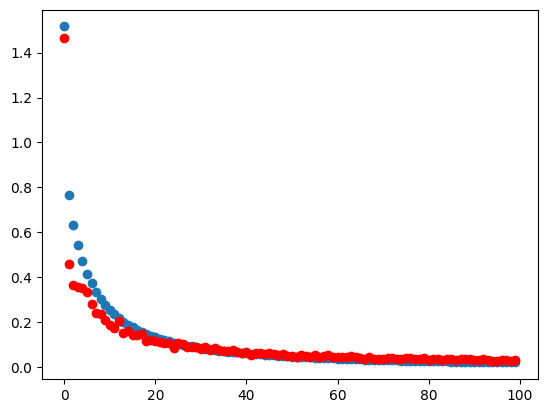

In [83]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

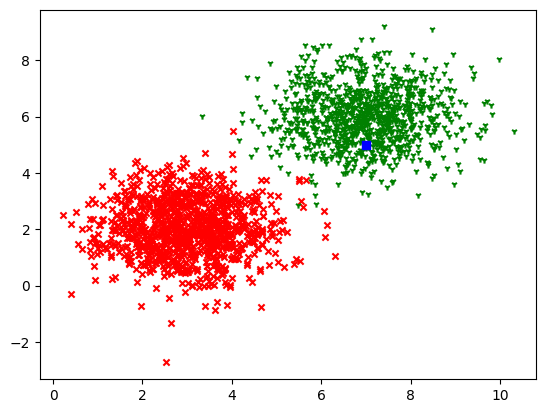

In [84]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [85]:
model.predict([[x,y]])

1/1 [==============================] - 0s 81ms/step


array([[9.9965537e-01, 3.4466025e-04]], dtype=float32)

##Number of epochs - 200

Definiujemy model:

In [86]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [87]:
model.add(Dense(units = 2, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [88]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [89]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [90]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [91]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[ 0.40152196, -0.27913799],
       [ 2.93831545,  3.15416321],
       [ 3.41174677,  0.25690969],
       ...,
       [ 4.44440077,  5.8797627 ],
       [ 8.0019706 ,  6.79916435],
       [ 7.88941671,  7.03935654]])

Proces **uczenia**:

In [92]:
epochs = 200
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/200
50/50 [==============================] - 1s 5ms/step - loss: 0.6784 - val_loss: 0.3702
Epoch 2/200
50/50 [==============================] - 0s 3ms/step - loss: 0.5356 - val_loss: 0.3391
Epoch 3/200
50/50 [==============================] - 0s 4ms/step - loss: 0.4600 - val_loss: 0.2245
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 0.4085 - val_loss: 0.2349
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 0.3694 - val_loss: 0.3204
Epoch 6/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3371 - val_loss: 0.2520
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - loss: 0.3080 - val_loss: 0.3332
Epoch 8/200
50/50 [==============================] - 0s 3ms/step - loss: 0.2851 - val_loss: 0.2028
Epoch 9/200
50/50 [==============================] - 0s 3ms/step - loss: 0.2649 - val_loss: 0.1968
Epoch 10/200
50/50 [==============================] - 0s 3ms/step - loss: 0.2471 - val_loss: 0.1831
Epoch 11/

In [93]:
Loss = h.history['loss']
Loss

[0.6784455180168152,
 0.5356225371360779,
 0.4600488245487213,
 0.4084789752960205,
 0.36936116218566895,
 0.33707332611083984,
 0.30803194642066956,
 0.28507933020591736,
 0.264873206615448,
 0.2470579892396927,
 0.23221024870872498,
 0.2195177972316742,
 0.20725727081298828,
 0.19635702669620514,
 0.18779949843883514,
 0.1786968857049942,
 0.17117443680763245,
 0.1645413637161255,
 0.1580677032470703,
 0.15219205617904663,
 0.146778404712677,
 0.1422378122806549,
 0.13723060488700867,
 0.13297495245933533,
 0.12948019802570343,
 0.12549930810928345,
 0.12192316353321075,
 0.11857472360134125,
 0.11577370017766953,
 0.1129259318113327,
 0.10989799350500107,
 0.1074390709400177,
 0.10517677664756775,
 0.10278339684009552,
 0.10083559900522232,
 0.09836948662996292,
 0.09669548273086548,
 0.09466107189655304,
 0.09291744977235794,
 0.09119588881731033,
 0.08955736458301544,
 0.0880376398563385,
 0.08660557121038437,
 0.08505592495203018,
 0.08370587974786758,
 0.08222075551748276,
 0.08

Sprawdźmy jakie są **wartości wag**:

In [94]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[ 1.0474969 -1.0475117]
 [ 1.3355495 -1.3355637]]
[-10.632143  10.632277]


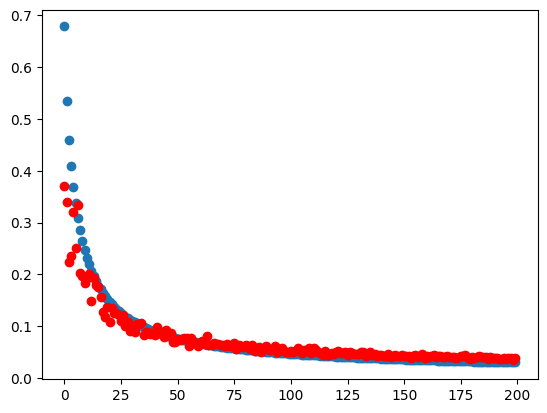

In [95]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

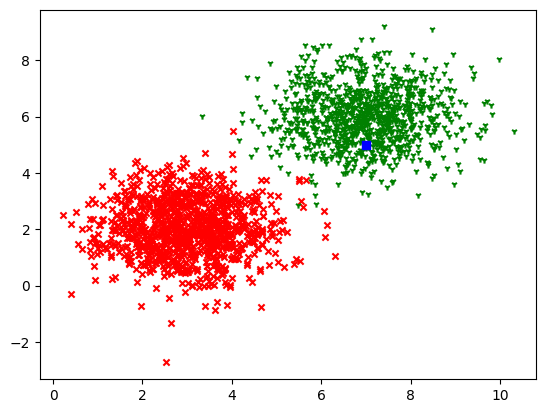

In [96]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [97]:
model.predict([[x,y]])

1/1 [==============================] - 0s 90ms/step


array([[0.99883777, 0.00116228]], dtype=float32)

##Number of epochs - 10

Definiujemy model:

In [98]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [99]:
model.add(Dense(units = 2, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [100]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [101]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [102]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [103]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[ 0.40152196, -0.27913799],
       [ 2.93831545,  3.15416321],
       [ 3.41174677,  0.25690969],
       ...,
       [ 4.44440077,  5.8797627 ],
       [ 8.0019706 ,  6.79916435],
       [ 7.88941671,  7.03935654]])

Proces **uczenia**:

In [104]:
epochs = 10
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/10
50/50 [==============================] - 1s 8ms/step - loss: 0.6953 - val_loss: 0.5287
Epoch 2/10
50/50 [==============================] - 0s 3ms/step - loss: 0.5342 - val_loss: 0.3537
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 0.4671 - val_loss: 0.4315
Epoch 4/10
50/50 [==============================] - 0s 2ms/step - loss: 0.4141 - val_loss: 0.3117
Epoch 5/10
50/50 [==============================] - 0s 3ms/step - loss: 0.3718 - val_loss: 0.3386
Epoch 6/10
50/50 [==============================] - 0s 3ms/step - loss: 0.3386 - val_loss: 0.2208
Epoch 7/10
50/50 [==============================] - 0s 3ms/step - loss: 0.3095 - val_loss: 0.2287
Epoch 8/10
50/50 [==============================] - 0s 3ms/step - loss: 0.2853 - val_loss: 0.2358
Epoch 9/10
50/50 [==============================] - 0s 3ms/step - loss: 0.2657 - val_loss: 0.2067
Epoch 10/10
50/50 [==============================] - 0s 2ms/step - loss: 0.2487 - val_loss: 0.1945


In [105]:
Loss = h.history['loss']
Loss

[0.6952502727508545,
 0.5341777205467224,
 0.46714943647384644,
 0.4141151010990143,
 0.37180405855178833,
 0.3386291563510895,
 0.30952635407447815,
 0.28533661365509033,
 0.2656831443309784,
 0.2486899048089981]

Sprawdźmy jakie są **wartości wag**:

In [106]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[ 0.14794256 -0.11549832]
 [ 0.63155496 -0.63953596]]
[-3.0937936  2.9573646]


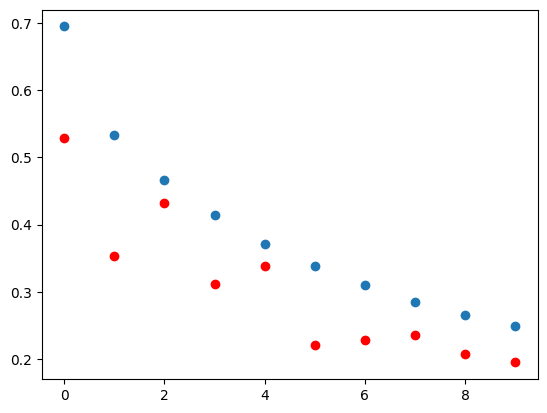

In [107]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

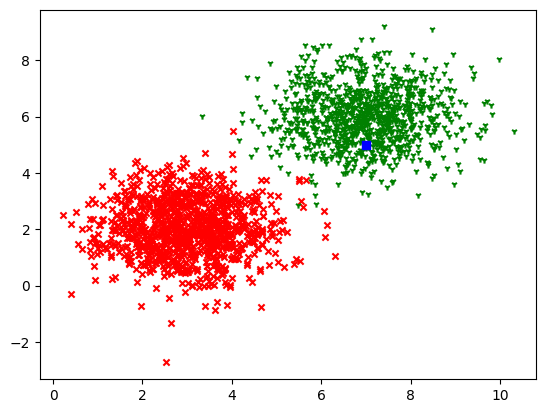

In [108]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [109]:
model.predict([[x,y]])

1/1 [==============================] - 0s 63ms/step


array([[0.8955175 , 0.10448248]], dtype=float32)

#Batch size - 10

Definiujemy model:

In [110]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [111]:
model.add(Dense(units = 2, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [112]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [113]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [114]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [115]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[ 0.40152196, -0.27913799],
       [ 2.93831545,  3.15416321],
       [ 3.41174677,  0.25690969],
       ...,
       [ 4.44440077,  5.8797627 ],
       [ 8.0019706 ,  6.79916435],
       [ 7.88941671,  7.03935654]])

Proces **uczenia**:

In [116]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2, batch_size=10)

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 0.5269 - val_loss: 0.2844
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3647 - val_loss: 0.3089
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2766 - val_loss: 0.1823
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.2242 - val_loss: 0.1340
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1903 - val_loss: 0.1223
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1653 - val_loss: 0.1193
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1458 - val_loss: 0.1833
Epoch 8/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1316 - val_loss: 0.1149
Epoch 9/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1201 - val_loss: 0.1052
Epoch 10/100
160/160 [==============================] - 0s 2ms/step - loss: 0.1105 - val_lo

In [117]:
Loss = h.history['loss']
Loss

[0.5268740653991699,
 0.3646547198295593,
 0.27659091353416443,
 0.22423988580703735,
 0.19030407071113586,
 0.1652795970439911,
 0.14578941464424133,
 0.13155947625637054,
 0.1200580820441246,
 0.1104867234826088,
 0.10294041037559509,
 0.09630795568227768,
 0.09085460007190704,
 0.08567914366722107,
 0.08107689768075943,
 0.07743283361196518,
 0.07399027049541473,
 0.07105305045843124,
 0.06812365353107452,
 0.06575477123260498,
 0.06330563873052597,
 0.0614933967590332,
 0.05948694795370102,
 0.057591512799263,
 0.05619237571954727,
 0.05449170991778374,
 0.05289752408862114,
 0.05141157656908035,
 0.05044524744153023,
 0.04933382198214531,
 0.048148803412914276,
 0.04695451632142067,
 0.04591341316699982,
 0.045105233788490295,
 0.04447516053915024,
 0.04348549246788025,
 0.04271206259727478,
 0.041737381368875504,
 0.04132881015539169,
 0.040492452681064606,
 0.03959232196211815,
 0.0392666794359684,
 0.03863563761115074,
 0.03804472088813782,
 0.037581074982881546,
 0.03672481328

Sprawdźmy jakie są **wartości wag**:

In [118]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[ 1.2287223 -1.2285511]
 [ 1.5051947 -1.5050318]]
[-12.097679  12.096138]


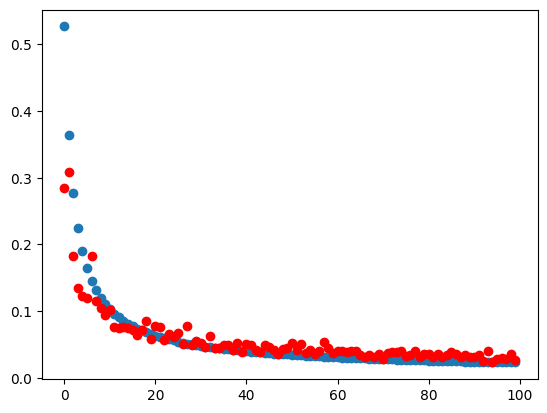

In [119]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

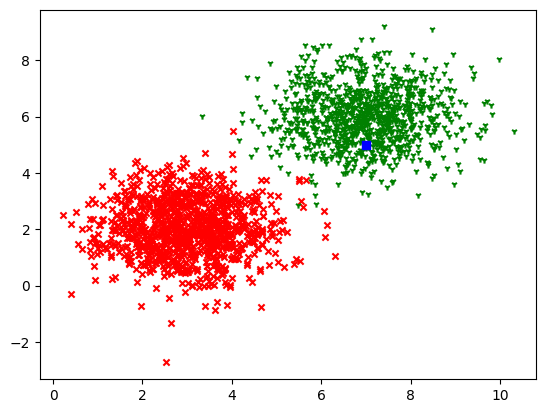

In [120]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [121]:
model.predict([[x,y]])

1/1 [==============================] - 0s 60ms/step


array([[9.9968362e-01, 3.1638655e-04]], dtype=float32)

##Batch size - 20

Definiujemy model:

In [122]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [123]:
model.add(Dense(units = 2, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [124]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [125]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [126]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [127]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[ 0.40152196, -0.27913799],
       [ 2.93831545,  3.15416321],
       [ 3.41174677,  0.25690969],
       ...,
       [ 4.44440077,  5.8797627 ],
       [ 8.0019706 ,  6.79916435],
       [ 7.88941671,  7.03935654]])

Proces **uczenia**:

In [128]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2,batch_size=20)

Epoch 1/100
80/80 [==============================] - 1s 4ms/step - loss: 0.6112 - val_loss: 0.2963
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 0.4669 - val_loss: 0.3295
Epoch 3/100
80/80 [==============================] - 0s 3ms/step - loss: 0.3906 - val_loss: 0.3000
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3347 - val_loss: 0.2047
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.2927 - val_loss: 0.2450
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 0.2605 - val_loss: 0.2003
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.2350 - val_loss: 0.2286
Epoch 8/100
80/80 [==============================] - 0s 3ms/step - loss: 0.2141 - val_loss: 0.1667
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1957 - val_loss: 0.1371
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.1820 - val_loss: 0.1407
Epoch 11/

In [129]:
Loss = h.history['loss']
Loss

[0.6111700534820557,
 0.4668550491333008,
 0.3906399607658386,
 0.3346618413925171,
 0.2926753759384155,
 0.26054322719573975,
 0.23497188091278076,
 0.2141416221857071,
 0.1956944614648819,
 0.18200160562992096,
 0.1696184128522873,
 0.15952251851558685,
 0.15056145191192627,
 0.14206132292747498,
 0.13501092791557312,
 0.12846863269805908,
 0.1225990280508995,
 0.11729642748832703,
 0.11271999031305313,
 0.1082160472869873,
 0.10470230877399445,
 0.10087325423955917,
 0.0975564569234848,
 0.09486865252256393,
 0.0918840765953064,
 0.08903318643569946,
 0.08687331527471542,
 0.08454969525337219,
 0.08239267021417618,
 0.08025812357664108,
 0.07847563922405243,
 0.07657019793987274,
 0.07490834593772888,
 0.07328765839338303,
 0.07185274362564087,
 0.07039814442396164,
 0.06874344497919083,
 0.06755462288856506,
 0.06621160358190536,
 0.06522177904844284,
 0.06404698640108109,
 0.0629650205373764,
 0.06187500059604645,
 0.060964569449424744,
 0.05998370051383972,
 0.05890507623553276,


Sprawdźmy jakie są **wartości wag**:

In [130]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[ 0.9734907  -0.97262555]
 [ 1.2679751  -1.2671809 ]]
[-9.973655  9.966012]


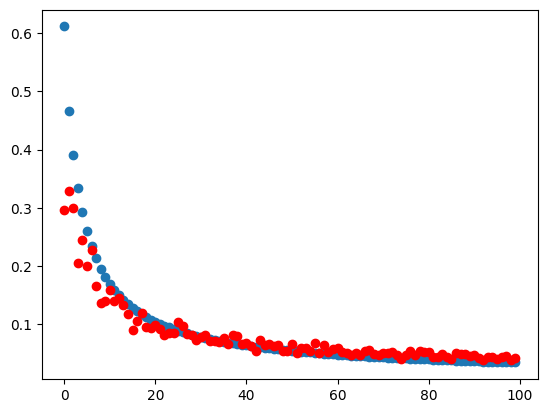

In [131]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

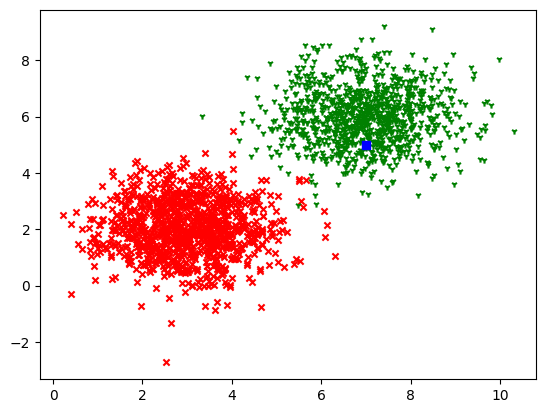

In [132]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [133]:
model.predict([[x,y]])

1/1 [==============================] - 0s 64ms/step


array([[0.9982717 , 0.00172823]], dtype=float32)

##Batch size 50

Definiujemy model:

In [134]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [135]:
model.add(Dense(units = 2, use_bias=True, input_dim=2, activation = "softmax"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [136]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [137]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [138]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [139]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[ 0.40152196, -0.27913799],
       [ 2.93831545,  3.15416321],
       [ 3.41174677,  0.25690969],
       ...,
       [ 4.44440077,  5.8797627 ],
       [ 8.0019706 ,  6.79916435],
       [ 7.88941671,  7.03935654]])

Proces **uczenia**:

In [140]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2, batch_size=50)

Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 0.7865 - val_loss: 0.5081
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5721 - val_loss: 0.5523
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5119 - val_loss: 0.4028
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4671 - val_loss: 0.3259
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4325 - val_loss: 0.3238
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4012 - val_loss: 0.2511
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3762 - val_loss: 0.2562
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3527 - val_loss: 0.3047
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3323 - val_loss: 0.2042
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3158 - val_loss: 0.2604
Epoch 11/

In [141]:
Loss = h.history['loss']
Loss

[0.7865446209907532,
 0.5721039772033691,
 0.5118865370750427,
 0.46707257628440857,
 0.43251490592956543,
 0.40116965770721436,
 0.37619659304618835,
 0.35274288058280945,
 0.3323124647140503,
 0.3157739043235779,
 0.2984319031238556,
 0.28456127643585205,
 0.2706998884677887,
 0.25949084758758545,
 0.24817800521850586,
 0.23819242417812347,
 0.22904853522777557,
 0.2210390269756317,
 0.21295221149921417,
 0.2055467665195465,
 0.19877807796001434,
 0.19261324405670166,
 0.18721123039722443,
 0.18143345415592194,
 0.1763581484556198,
 0.17154927551746368,
 0.167022705078125,
 0.16257637739181519,
 0.1585124433040619,
 0.15493258833885193,
 0.15109780430793762,
 0.1478949338197708,
 0.1448117196559906,
 0.14166739583015442,
 0.13848799467086792,
 0.13565881550312042,
 0.13311374187469482,
 0.13047762215137482,
 0.12799206376075745,
 0.12564422190189362,
 0.12370525300502777,
 0.12124334275722504,
 0.11932838708162308,
 0.11720170825719833,
 0.11520279198884964,
 0.1134670078754425,
 0.1

Sprawdźmy jakie są **wartości wag**:

In [142]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[ 0.68553364 -0.6842611 ]
 [ 1.0107037  -1.0096275 ]]
[-7.406832   7.3957624]


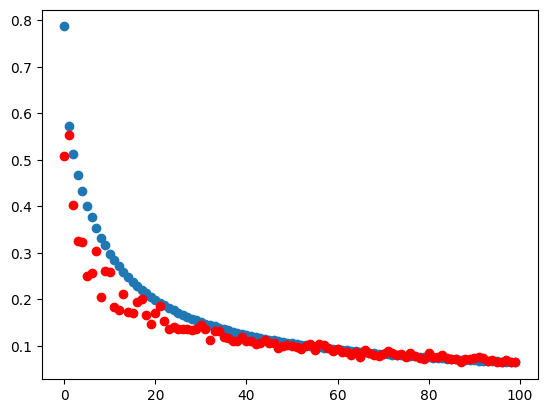

In [143]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

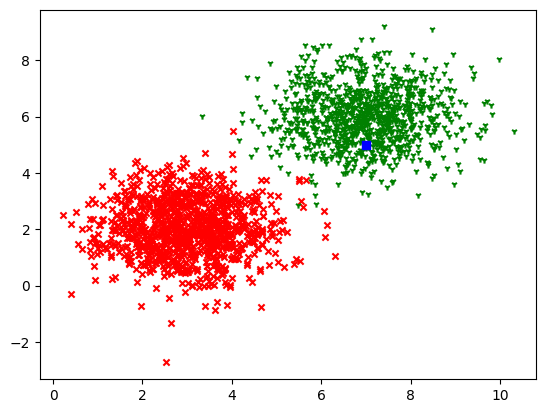

In [144]:
x=7.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [145]:
model.predict([[x,y]])

1/1 [==============================] - 0s 67ms/step


array([[0.9925171, 0.0074829]], dtype=float32)

Najlepsze wyniki otrzymałem dla współczynnika uczenia 0.1, liczby epok 3000, batcha równego 20, najgorsze dla współczynnika uczenia 0.001, liczby epok 10, batcha równego 50